In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

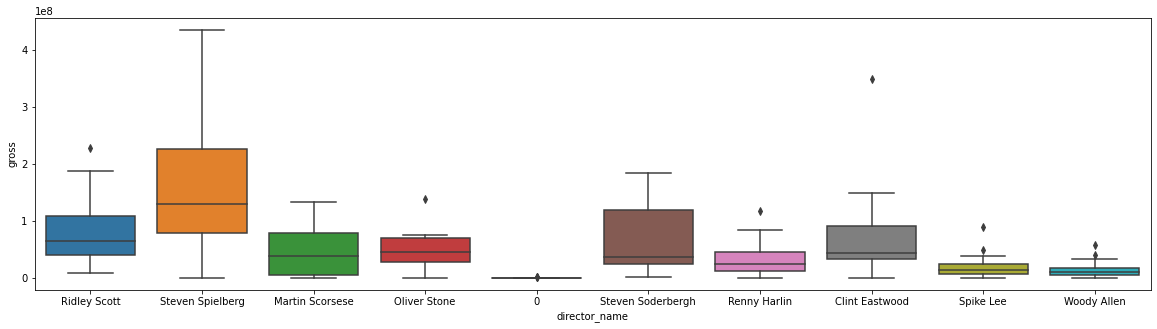

In [5]:
#Get the top 10 names of the directors based on the number of their directed movies.
top10_directors_with_most_movies = (data.groupby(data.director_name).nunique().movie_title.nlargest(10))
plot_top10_directors = data[data["director_name"].isin(top10_directors_with_most_movies.index)]

#Size of plot.
plt.figure(figsize=(20,5))
sns.boxplot(x="director_name", y="gross", data = plot_top10_directors)
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

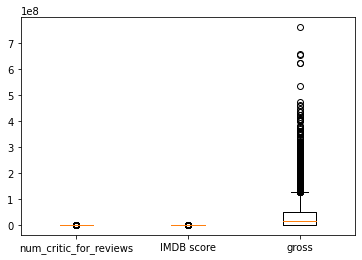

In [6]:
#Setting up the box plot with thier labels.
plt.boxplot([data['num_critic_for_reviews'], data['imdb_score'], data['gross']], labels = ['num_critic_for_reviews' , 'IMDB score', 'gross'])
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [7]:
#The difference of gross and budget will be added to a new column "sales".
data['sales'] = data['gross'] - data['budget']
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0


## Which directors garnered the most total sales?

In [8]:
#Top 10 Directors with most sales.
#Fun fact: Asian directors have the lowest sales if we set ascending=True.
directors_with_most_total_sales = data.groupby("director_name")["sales"].sum().sort_values(ascending=False)[:10].to_frame()
directors_with_most_total_sales 

,sales
director_name,
Steven Spielberg,2.451332e+09
George Lucas,1.386641e+09
James Cameron,1.199626e+09
Joss Whedon,1.000887e+09
Chris Columbus,9.417076e+08
Peter Jackson,9.009693e+08
Tim Burton,8.242755e+08
Christopher Nolan,8.082276e+08
Jon Favreau,7.693815e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

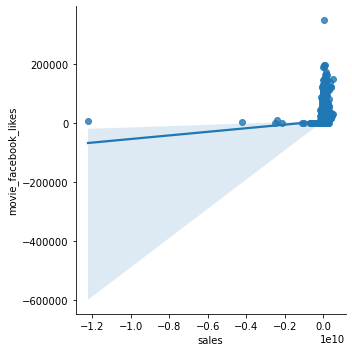

In [9]:
#movie_facebook_likes is the average likes.
sns.lmplot(x="sales", y="movie_facebook_likes", data=data, height=5)
plt.show()

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

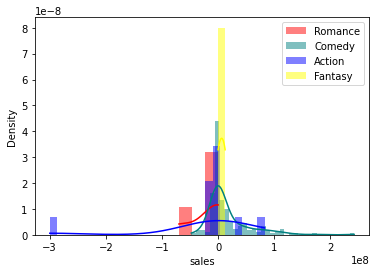

In [10]:
#Generating histograms and assigning different colors each.
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="yellow", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()
plt.show()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [11]:
#Computing the average likes of the 3 actors and storing them to average_actor_likes.
data['average_actor_likes'] = data[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333


## Copying the whole dataframe

In [12]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [13]:
#Normalization of num_critic_for_reviews
max = df['num_critic_for_reviews'].max()
min = df['num_critic_for_reviews'].min()
df['nm_num_critic_for_reviews'] = (data['num_critic_for_reviews'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,0.889299
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,0.371464


In [14]:
#Normalization of duration
max = df['duration'].max()
min = df['duration'].min()
df['nm_duration'] = (data['duration'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,0.889299,0.941799
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,0.371464,0.894180


In [15]:
#Normalization of director_facebook_likes
max = df['director_facebook_likes'].max()
min = df['director_facebook_likes'].min()
df['nm_director_facebook_likes'] = (data['director_facebook_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333,0.889299,0.941799,0.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,0.371464,0.894180,0.024478


In [16]:
#Normalization of actor_3_facebook_likes
max = df['actor_3_facebook_likes'].max()
min = df['actor_3_facebook_likes'].min()
df['nm_actor_3_facebook_likes'] = (data['actor_3_facebook_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,936.0,7.9,1.78,33000.0,523505847.0,930.333333,0.889299,0.941799,0.000000,0.037174
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,5000.0,7.1,2.35,0.0,9404152.0,15333.333333,0.371464,0.894180,0.024478,0.043478


In [17]:
#Normalization of actor_1_facebook_likes
max = df['actor_1_facebook_likes'].max()
min = df['actor_1_facebook_likes'].min()
df['nm_actor_1_facebook_likes'] = (data['actor_1_facebook_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,7.9,1.78,33000.0,523505847.0,930.333333,0.889299,0.941799,0.000000,0.037174,0.001563
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,7.1,2.35,0.0,9404152.0,15333.333333,0.371464,0.894180,0.024478,0.043478,0.062500


In [18]:
#Normalization of gross
max = df['gross'].max()
min = df['gross'].min()
df['nm_gross'] = (data['gross'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,aspect_ratio,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,1.78,33000.0,523505847.0,930.333333,0.889299,0.941799,0.000000,0.037174,0.001563,1.00000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,2.35,0.0,9404152.0,15333.333333,0.371464,0.894180,0.024478,0.043478,0.062500,0.40684


In [19]:
#Normalization of num_voted_users
max = df['num_voted_users'].max()
min = df['num_voted_users'].min()
df['nm_num_voted_users'] = (data['num_voted_users'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,movie_facebook_likes,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,33000.0,523505847.0,930.333333,0.889299,0.941799,0.000000,0.037174,0.001563,1.00000,0.524454
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.0,9404152.0,15333.333333,0.371464,0.894180,0.024478,0.043478,0.062500,0.40684,0.278867


In [20]:
#Normalization of cast_total_facebook_likes
max = df['cast_total_facebook_likes'].max()
min = df['cast_total_facebook_likes'].min()
df['nm_cast_total_facebook_likes'] = (data['cast_total_facebook_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,sales,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,523505847.0,930.333333,0.889299,0.941799,0.000000,0.037174,0.001563,1.00000,0.524454,0.007361
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,9404152.0,15333.333333,0.371464,0.894180,0.024478,0.043478,0.062500,0.40684,0.278867,0.073622


In [21]:
#Normalization of facenumber_in_poster
max = df['facenumber_in_poster'].max()
min = df['facenumber_in_poster'].min()
df['nm_facenumber_in_poster'] = (data['facenumber_in_poster'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,average_actor_likes,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,930.333333,0.889299,0.941799,0.000000,0.037174,0.001563,1.00000,0.524454,0.007361,0.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,15333.333333,0.371464,0.894180,0.024478,0.043478,0.062500,0.40684,0.278867,0.073622,0.0


In [22]:
#Normalization of num_user_for_reviews
max = df['num_user_for_reviews'].max()
min = df['num_user_for_reviews'].min()
df['nm_num_user_for_reviews'] = (data['num_user_for_reviews'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_num_critic_for_reviews,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.889299,0.941799,0.000000,0.037174,0.001563,1.00000,0.524454,0.007361,0.0,0.603557
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.371464,0.894180,0.024478,0.043478,0.062500,0.40684,0.278867,0.073622,0.0,0.244664


In [23]:
#Normalization of budget
max = df['budget'].max()
min = df['budget'].min()
df['nm_budget'] = (data['budget'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_duration,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.941799,0.000000,0.037174,0.001563,1.00000,0.524454,0.007361,0.0,0.603557,0.019402
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.894180,0.024478,0.043478,0.062500,0.40684,0.278867,0.073622,0.0,0.244664,0.024559


In [24]:
#Normalization of title_year
max = df['title_year'].max()
min = df['title_year'].min()
df['nm_title_year'] = (data['title_year'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_director_facebook_likes,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.000000,0.037174,0.001563,1.00000,0.524454,0.007361,0.0,0.603557,0.019402,0.996528
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.024478,0.043478,0.062500,0.40684,0.278867,0.073622,0.0,0.244664,0.024559,0.995536


In [25]:
#Normalization of actor_2_facebook_likes
max = df['actor_2_facebook_likes'].max()
min = df['actor_2_facebook_likes'].min()
df['nm_actor_2_facebook_likes'] = (data['actor_2_facebook_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_actor_3_facebook_likes,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.037174,0.001563,1.00000,0.524454,0.007361,0.0,0.603557,0.019402,0.996528,0.006832
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.043478,0.062500,0.40684,0.278867,0.073622,0.0,0.244664,0.024559,0.995536,0.036496


In [26]:
#Normalization of imdb_score
max = df['imdb_score'].max()
min = df['imdb_score'].min()
df['nm_imdb_score'] = (data['imdb_score'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_actor_1_facebook_likes,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.001563,1.00000,0.524454,0.007361,0.0,0.603557,0.019402,0.996528,0.006832,0.831579
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.062500,0.40684,0.278867,0.073622,0.0,0.244664,0.024559,0.995536,0.036496,0.747368


In [27]:
#Normalization of aspect_ratio
max = df['aspect_ratio'].max()
min = df['aspect_ratio'].min()
df['nm_aspect_ratio'] = (data['aspect_ratio'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_gross,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,1.00000,0.524454,0.007361,0.0,0.603557,0.019402,0.996528,0.006832,0.831579,0.111250
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.40684,0.278867,0.073622,0.0,0.244664,0.024559,0.995536,0.036496,0.747368,0.146875


In [28]:
#Normalization of movie_facebook_likes
max = df['movie_facebook_likes'].max()
min = df['movie_facebook_likes'].min()
df['nm_movie_facebook_likes'] = (data['movie_facebook_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_num_voted_users,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.524454,0.007361,0.0,0.603557,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.278867,0.073622,0.0,0.244664,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000


In [29]:
#Normalization of sales
max = df['sales'].max()
min = df['sales'].min()
df['nm_sales'] = (data['sales'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_cast_total_facebook_likes,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes,nm_sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.007361,0.0,0.603557,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.073622,0.0,0.244664,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637


In [30]:
#Normalization of average_actor_likes
max = df['average_actor_likes'].max()
min = df['average_actor_likes'].min()
df['nm_average_actor_likes'] = (data['average_actor_likes'] - min) / (max-min)
df.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,nm_facenumber_in_poster,nm_num_user_for_reviews,nm_budget,nm_title_year,nm_actor_2_facebook_likes,nm_imdb_score,nm_aspect_ratio,nm_movie_facebook_likes,nm_sales,nm_average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,0.0,0.603557,0.019402,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,0.0,0.244664,0.024559,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
